
# TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>I analyzed the dataset which contains information of about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
##### Column names: 
    id : identification number
    imdb_id	- unique movie identification code
    popularity	- popularity ratings in numeric value
    budget - amount spent 	
    revenue	- amount generated from movie
    original_title	- name of movie
    cast	- name of main actors
    homepage - webpage of movie	
    director - director of movie	
    tagline	...	unique to each movie
    overview	- brief description of movie
    runtime - total time the movie runs in numeric value
    genres	- genre of movie
    production_companies - list(s) of companies who produced movie	
    release_date - date movie was released in date format	
    vote_count	- total vote counts in numeric format
    vote_average - average vote in numeric format	
    release_year- year movie was released
    budget_adj	- budget of the associated movie
    in terms of 2010 dollars, accounting for inflation over
    time.
    revenue_ad- revenue of the associated movie
    in terms of 2010 dollars, accounting for inflation over
    time.



### Question(s) for Analysis

>The analysis is focused on answering the questions:
1. Which movie title had the highest budget?
2. Which movie titles has the highest revenue?
3. Which movies are the most popular of all times?
4. Is there a correlation between vote_count and revenue?
5. What kinds of properties are associated with movies that have high revenues?

#### Importing packages


In [1]:
# import packages and a 'magic word'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.1

Requirement already up-to-date: pandas==0.25.1 in /opt/conda/lib/python3.6/site-packages (0.25.1)


<a id='wrangling'></a>
## Data Wrangling

### General Properties


#### Reading data using read_csv() function

In [3]:
df = pd.read_csv('tmdb-movies.csv')

In [4]:
# print out first few lines to inspect data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# checking the number of rows and columns in dataset
df.shape

(10866, 21)

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# inspecting datatypes
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
# checking for nulls if any
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [9]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [10]:
#prints out the number of duplicates
sum(df.duplicated())

1

In [11]:
#prints out columns containing nulls and number of null
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Assessing Data
- Missing values in cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies (NaN)
- Duplicate row of data
- Columns not useful in identifying trends


### Data Cleaning

> The data contains 10866 rows and 12 columns with one duplicated row of data(which needs to be removed). The column names are explanatory enough and easy to work with, so no renaming will be done. I discovered that some columns were specific to movie and not particularly useful in finding trends, so I'll remove those. 

#### Dropping Duplicates

In [12]:
# To drop duplicate entries
df.drop_duplicates(inplace = True)

In [13]:
# To check if duplicate has been dropped successfully
df.shape

(10865, 21)

The rows reduced from 10866 to 10855 which indicates that the duplicate has been successfully dropped

#### Dropping Columns

In [14]:
# Dropping columns that are specific to movie or not useful in finding trends
df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'production_companies'], axis = 1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


The columns were successfully dropped

In [16]:
# checking for nulls
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

Nulls were found in 3 columns, further analysis carried out below to determine if the rows should be deleted.

In [17]:
# checking rows where director is null
df[df.director.isnull()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,1/23/15,14,6.6,2015,0.000000e+00,0.000000e+00
548,355131,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,8/10/15,12,7.5,2015,0.000000e+00,0.000000e+00
556,321160,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,1/24/15,14,6.5,2015,0.000000e+00,0.000000e+00
1032,259910,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,3/18/14,32,6.3,2014,0.000000e+00,0.000000e+00
1054,253675,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,1/19/14,11,7.2,2014,0.000000e+00,0.000000e+00
1203,256561,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,75,Documentary,3/19/14,40,7.0,2014,1.381637e+05,0.000000e+00
1241,296370,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,0,Romance|Music|Comedy,1/1/14,18,5.7,2014,0.000000e+00,0.000000e+00
1288,301235,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,94,Documentary,11/17/14,12,6.8,2014,0.000000e+00,0.000000e+00
1852,133365,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,100,Drama,1/9/09,19,7.5,2009,0.000000e+00,0.000000e+00
1872,26379,0.091395,3250000,0,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,NaN,133,Drama|Family|Foreign,12/4/09,11,6.1,2009,3.303301e+06,0.000000e+00


After assessing printout, zero values were found in budget and revenue columns. I decided to drop the row containing nulls in director column since the number of rows(44) were small compared to my dataset, and won't affect my analysis significantly.

In [18]:
# checking rows where genres is null
df[df.genres.isnull()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0


After assessing printout, zero values were found in budget and revenue columns. I decided to drop the row containing nulls in the genres column since the number of rows(23) were small compared to my dataset, and won't affect my analysis significantly.

In [19]:
# checking rows where cast is null
df[df.cast.isnull()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,11/25/15,47,6.9,2015,0.000000,0.0
441,355020,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,10/9/15,37,8.2,2015,0.000000,0.0
465,321109,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,135,Documentary,1/24/15,19,7.8,2015,0.000000,0.0
536,333350,0.122543,0,0,A Faster Horse,NaN,David Gelb,90,Documentary,10/8/15,12,8.0,2015,0.000000,0.0
538,224972,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,1/1/15,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,13926,0.253376,0,0,Red's Dream,NaN,John Lasseter,4,Animation,8/17/87,44,6.6,1987,0.000000,0.0
9755,48714,0.046272,0,0,The Big Shave,NaN,Martin Scorsese,6,Drama,1/1/68,12,6.7,1968,0.000000,0.0
10434,48784,0.146906,200,0,Six Men Getting Sick,NaN,David Lynch,4,Animation,1/1/67,16,5.2,1967,1307.352748,0.0
10550,13925,0.306425,0,0,Luxo Jr.,NaN,John Lasseter,2,Animation|Family,8/17/86,81,7.3,1986,0.000000,0.0


After assessing printout, zero values were found in budget and revenue columns. I decided to drop the row containing nulls in the **cast** column since the number of rows(23) were small compared to my dataset, and won't affect my analysis significantly.

In [20]:
# dropping rows containing nulls
df.dropna(inplace = True)

In [21]:
# checking to see rows containing nulls successfully dropped
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which movie title had the highest budget?

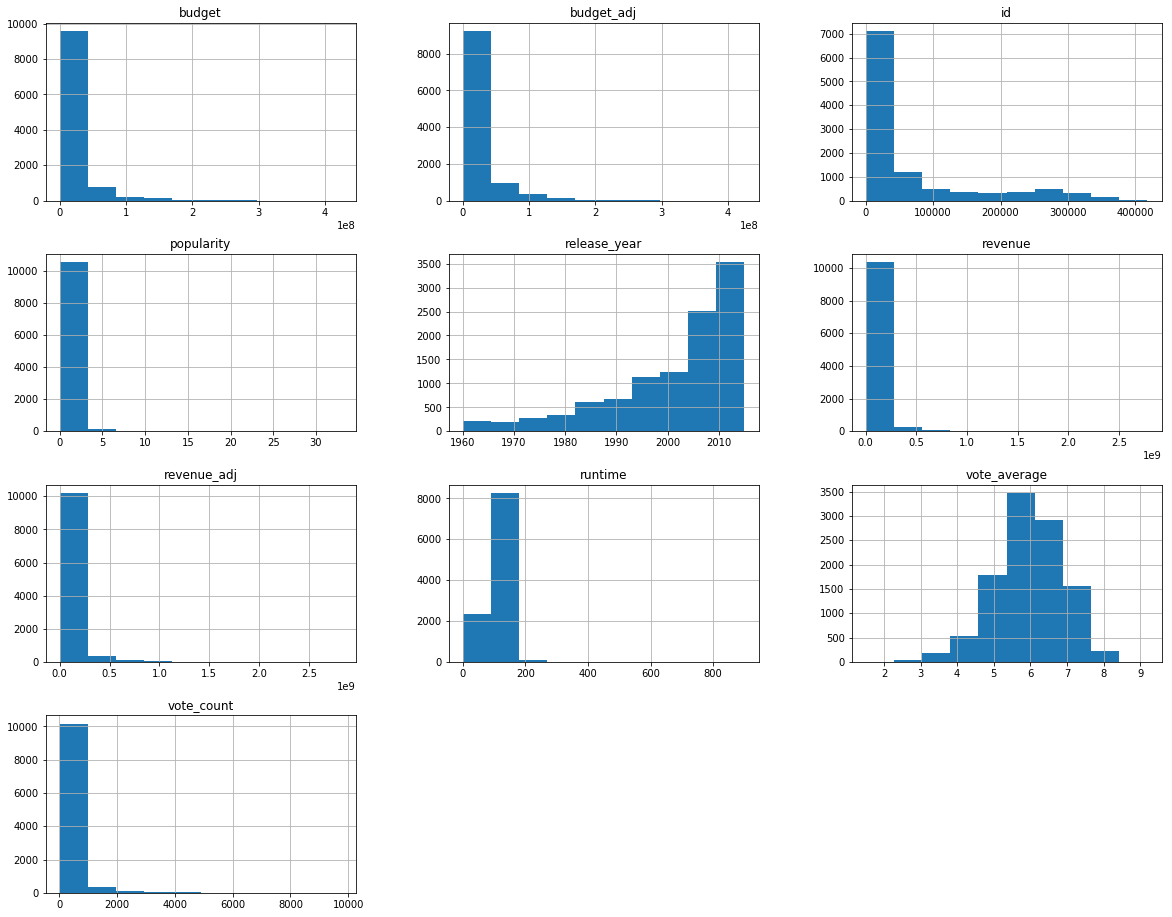

In [23]:
# explore data
df.hist(figsize=(20,16));


In [24]:
top10_hb = df[['original_title', 'budget']].sort_values(by='budget', ascending=False).head(10)
top10_hb

,original_title,budget
2244,The Warrior's Way,425000000
3375,Pirates of the Caribbean: On Stranger Tides,380000000
7387,Pirates of the Caribbean: At World's End,300000000
14,Avengers: Age of Ultron,280000000
6570,Superman Returns,270000000
4411,John Carter,260000000
1929,Tangled,260000000
7394,Spider-Man 3,258000000
5508,The Lone Ranger,255000000
1389,Harry Potter and the Half-Blood Prince,250000000


####  Prints out the top 10 movies based on budget in descending order

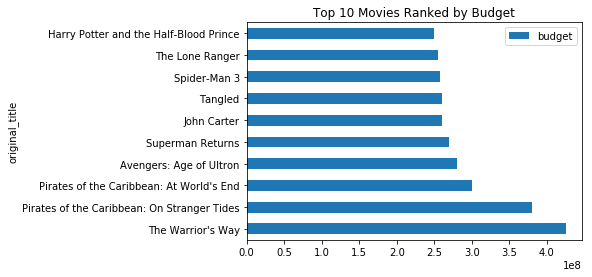

In [25]:
top10_hb.set_index('original_title').plot(kind ='barh')
plt.title('Top 10 Movies Ranked by Budget');

#### The Viz above is an horizontal bar chart showing the top 10 movies by budget

## Research Question 2: Which movie titles has the highest revenue?

In [26]:
# print out the top 10 movies by revenue generated in DESC order
top10_rev = df[['original_title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
top10_rev

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
4,Furious 7,1506249360
14,Avengers: Age of Ultron,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822
5422,Frozen,1274219009
5425,Iron Man 3,1215439994


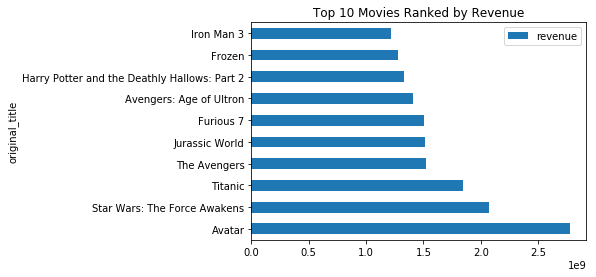

In [27]:
top10_rev.set_index('original_title').plot(kind='barh')
plt.title('Top 10 Movies Ranked by Revenue');

### The Viz above represents the Top 10 movies of time(1960-2015) based on revenue generated plotted in a horizontal bar chart

## Research Question 3: Which movies are the most popular of all time?

In [28]:
# prints out list of movies based on popularity ratings in DESC order
df[['original_title', 'popularity']].sort_values(by ='popularity', ascending=False)

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
...,...,...
7268,Born into Brothels,0.001117
6961,Khosla Ka Ghosla!,0.001115
6551,Mon petit doigt m'a dit...,0.000973
6080,G.B.F.,0.000620


In [29]:
#Top 10 most popular movies of all time sorted in ascending order
top_10_pm = df[['original_title', 'popularity']].sort_values(by='popularity', ascending=True).tail(10)
top_10_pm

,original_title,popularity
633,The Hunger Games: Mockingjay - Part 1,10.739009
3,Star Wars: The Force Awakens,11.173104
632,John Wick,11.422751
1329,Star Wars,12.037933
631,Captain America: The Winter Soldier,12.971027
2,Insurgent,13.112507
630,Guardians of the Galaxy,14.311205
629,Interstellar,24.949134
1,Mad Max: Fury Road,28.419936
0,Jurassic World,32.985763


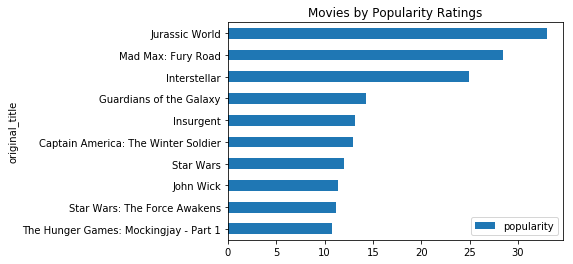

In [30]:
top_10_pm.set_index('original_title').plot(kind ='barh')
plt.title('Movies by Popularity Ratings');

### The Viz above presents Jurassic World as the most popular movie of all time

## Research Question 4: Is there a Correlation between vote_count and revenue?

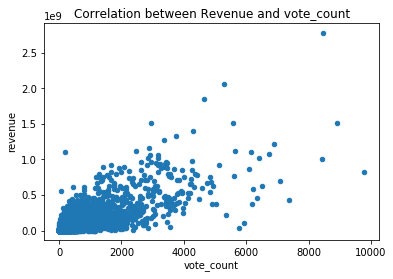

In [31]:
df.plot(x='vote_count', y='revenue',kind='scatter')
plt.title('Correlation between Revenue and vote_count')
plt.show();


### The scatterplot aboove shows no correlation between vote count and revenue. This implies that vote count is not a deciding factor in revenue generated by a movie, it cannot be used to determine if a movie will generate high revenue or not.

## Research Question 5 : Properties associated with movies that generates high revenue.

#### I'll be analyzing properies such as : Popularity ratings, Budget.

In [32]:
# high revenue is revenue above or equal to the average revenue

In [33]:
#printing average revenue gnerated by movies
avg = df['revenue'].mean()
avg

40319887.588016026

In [34]:
#printing dataframe where revenue >= average revenue
high_rev = df.query('revenue >=40319887.588016026')
high_rev

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10760,8469,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,John Landis,109,Comedy,7/27/78,230,6.7,1978,9.025292e+06,4.713208e+08
10761,6081,1.090065,0,49579269,Revenge of the Pink Panther,Peter Sellers|Andrew Sachs|Herbert Lom|Burt Kw...,Blake Edwards,104,Action|Comedy|Thriller|Crime|Family,7/19/78,56,6.2,1978,0.000000e+00,1.657287e+08
10762,11778,0.959754,15000000,50000000,The Deer Hunter,Robert De Niro|John Cazale|John Savage|Christo...,Michael Cimino,183,Drama|War,12/8/78,464,7.4,1978,5.014051e+07,1.671350e+08
10764,11455,0.608679,0,41590893,Up in Smoke,Cheech Marin|Tommy Chong|Strother Martin|Edie ...,Lou Adler,86,Comedy,1/1/78,103,6.5,1978,0.000000e+00,1.390259e+08


In [35]:
low_rev = df.query('revenue <40319887.588016026')
low_rev

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
12,264660,6.118847,15000000,36869414,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108,Drama|Science Fiction,1/21/15,2854,7.6,2015,1.379999e+07,3.391985e+07
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
35,264644,3.557846,6000000,35401758,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,117,Drama|Thriller,10/16/15,1520,8.0,2015,5.519998e+06,3.256960e+07
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
42,321697,3.079522,30000000,34441873,Steve Jobs,Michael Fassbender|Kate Winslet|Seth Rogen|Kat...,Danny Boyle,122,History|Drama,10/9/15,1035,6.9,2015,2.759999e+07,3.168651e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


### Popularity Ratings?

In [36]:
# getting avg popularity ratings above avg revenue
high_rev['popularity'].mean()
# df.popularity[high_rev].mean()

1.6274469582560296

In [37]:
# getting avg popularity ratings below avg revenue
low_rev['popularity'].mean()

0.40751406029154513

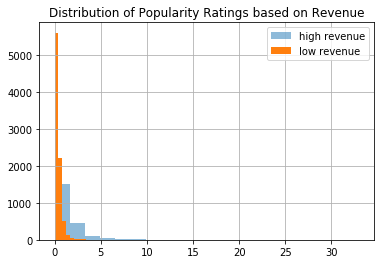

In [38]:
# visualizing results to explain better.
high_rev['popularity'].hist(alpha=0.5, bins=20, label='high revenue')
low_rev['popularity'].hist(bins =20, label='low revenue')
plt.legend()
plt.title('Distribution of Popularity Ratings based on Revenue');


### The Visualization above shows that movies with high revenue have more popularity ratings.

###  Budget?

In [39]:
# getting avg budget above avg revenue
high_rev['budget'].mean()

52225932.346938774

In [40]:
# getting avg budget below avg revenue
low_rev['budget'].mean()

5394614.184489796

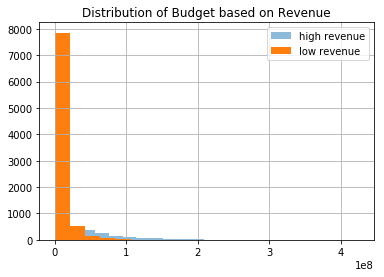

In [41]:
# Explaining results gotten better with visuals
high_rev['budget'].hist(alpha=0.5, bins=20, label='high revenue')
low_rev['budget'].hist(bins =20, label='low revenue')
plt.legend()
plt.title('Distribution of Budget based on Revenue');

### The visualization shows that movies with high revenues generated have high budgets.

### Limitations to this : Director of movie, Popularity ratings. Also, the top 5 movies with largest budgets did not produce largest revenue(As seen in Question 1 and 2)

<a id='conclusions'></a>
## Conclusions

1. The most popular movies of all time are Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of Galaxy and Insurgent.
<br>

2. The Scatter plot visualization plotted shows that there is no correlation between vote_counts and revenue generated. 
<br>

3. High Popularity ratings is associated with movies that generates high revenue
<br>

4. The budget of a movie that generated low revenue was about 5 million while that of a high revenue movie over 52 million. This clearly shows that budget of a movie is correlated with the revenue of a movie, but there are limitations to this result such as other variables which the revenue is dependent on such as the year the movie was released(release_year) and Director of movie. 


### Limitation

1. Top 5 Movies with highest budget are not top 5 movies with highest revenues.


In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0